In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random

In [105]:
#apple, banana, plum, pepper, cherry, grape, tomato, potato, pear, peach
CATEGORIES = ["Apple Braeburn","Apple Crimson Snow","Apple Golden 1","Apple Golden 2","Apple Golden 3",
              "Apple Granny Smith","Apple Pink Lady","Apple Red 1", "Apple Red 2","Apple Red 3","Apple Red Delicious",
              "Apple Red Yellow 1","Apple Red Yellow 2","Banana",
            #  "Plum","Plum 2", "Plum 3",
             "Pepper Yellow","Pepper Red","Pepper Green",
           #   "Cherry 1", "Cherry 2", "Cherry Rainier", "Cherry Wax Black", "Cherry Wax Red","Cherry Wax Yellow",
          #    "Grape Blue", "Grape Pink", "Grape White", "Grape White 2", "Grape White 3", "Grape White 4",
         #    "Tomato 1","Tomato 2","Tomato 3","Tomato 4","Tomato Yellow","Tomato Maroon",
        #     "Pear","Pear Abate","Pear Forelle","Pear Kaiser","Pear Monster","Pear Red","Pear Williams",
       #      "Peach","Peach 2","Peach Flat"
             
             ]

    
DATADIR = "../dataset/fruits-360/Training"
#CATEGORIES = os.listdir(DATADIR)
#TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
TYPES = ["Apple", "Banana","Pepper"]
fruits= {}
for cat in CATEGORIES:
    for typ in TYPES:
        if(cat.startswith(typ)):
            fruits[cat] = typ

#CATEGORIES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]



In [106]:
fruits

{'Apple Braeburn': 'Apple',
 'Apple Crimson Snow': 'Apple',
 'Apple Golden 1': 'Apple',
 'Apple Golden 2': 'Apple',
 'Apple Golden 3': 'Apple',
 'Apple Granny Smith': 'Apple',
 'Apple Pink Lady': 'Apple',
 'Apple Red 1': 'Apple',
 'Apple Red 2': 'Apple',
 'Apple Red 3': 'Apple',
 'Apple Red Delicious': 'Apple',
 'Apple Red Yellow 1': 'Apple',
 'Apple Red Yellow 2': 'Apple',
 'Banana': 'Banana',
 'Pepper Yellow': 'Pepper',
 'Pepper Red': 'Pepper',
 'Pepper Green': 'Pepper'}

In [107]:
for category in CATEGORIES:  # do dogs and cats
    print(category)

    path = os.path.join(DATADIR,category)  # create path to dogs and cats
  


Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith
Apple Pink Lady
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious
Apple Red Yellow 1
Apple Red Yellow 2
Banana
Pepper Yellow
Pepper Red
Pepper Green


In [108]:
path = os.path.join(DATADIR,"Pepper")  # create path to dogs and cats
img_array = cv2.imread(os.path.join(path,img) )  # convert to array
img_array = cv2.resize(img_array, (32, 32))
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.imshow(img_array)  # graph it

TypeError: join() argument must be str or bytes, not 'ndarray'

In [156]:
training_data = []
IMG_SIZE = 32
check =[]
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        #class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        class_num = fruits[category]
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                check.append(new_array)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

random.shuffle(training_data)

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


#X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = np.array(X)
y = np.array(y)
X = X/255.0

X



  0%|                                                  | 0/492 [00:00<?, ?it/s]

 36%|█████████████▌                        | 175/492 [00:00<00:00, 1733.23it/s]

100%|██████████████████████████████████████| 492/492 [00:00<00:00, 1757.71it/s]


  0%|                                                  | 0/444 [00:00<?, ?it/s]

 35%|█████████████▍                        | 157/444 [00:00<00:00, 1554.95it/s]

100%|██████████████████████████████████████| 444/444 [00:00<00:00, 1701.60it/s]


  0%|                                                  | 0/480 [00:00<?, ?it/s]

 38%|██████████████▎                       | 180/480 [00:00<00:00, 1783.01it/s]

100%|██████████████████████████████████████| 480/480 [00:00<00:00, 1752.37it/s]


  0%|                                                  | 0/492 [00:00<?, ?it/s]

 38%|██████████████▎                       | 186/492 [00:00<00:00, 1842.19it/s]

100%|██████████████████████████████████████| 492/492 [00:00<00:00, 1864.24it/s]


  0%|                 

8670


array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

['Pepper' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Pepper' 'Pepper'
 'Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Banana' 'Apple' 'Apple' 'Apple'
 'Apple' 'Apple' 'Pepper' 'Pepper' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple'
 'Pepper' 'Apple' 'Apple' 'Apple' 'Pepper' 'Apple' 'Apple' 'Apple' 'Apple'
 'Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple'
 'Pepper' 'Apple' 'Pepper' 'Apple' 'Apple' 'Pepper' 'Apple' 'Apple'
 'Apple' 'Apple' 'Apple' 'Pepper' 'Apple' 'Banana' 'Banana' 'Apple'
 'Banana' 'Apple' 'Pepper' 'Apple' 'Apple' 'Apple' 'Pepper' 'Pepper'
 'Apple' 'Apple' 'Pepper' 'Apple' 'Pepper' 'Apple' 'Apple' 'Apple' 'Apple'
 'Apple' 'Apple' 'Pepper' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Apple'
 'Pepper' 'Apple' 'Pepper' 'Apple' 'Apple' 'Apple' 'Apple' 'Banana'
 'Pepper' 'Apple' 'Pepper' 'Apple' 'Apple' 'Apple']


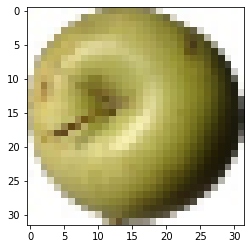

In [143]:
print(y[100:200])
plt.imshow(X[101])  # graph it

In [160]:
DATADIR_test = "../dataset/fruits-360/Test"
CATEGORIES_test = ["Apple Braeburn","Apple Crimson Snow","Apple Golden 1","Apple Golden 2","Apple Golden 3",
              "Apple Granny Smith","Apple Pink Lady","Apple Red 1", "Apple Red 2","Apple Red 3","Apple Red Delicious",
              "Apple Red Yellow 1","Apple Red Yellow 2","Banana",
              #"Plum","Plum 2", "Plum 3",
              "Pepper Yellow","Pepper Red","Pepper Green",
           #   "Cherry 1", "Cherry 2", "Cherry Rainier", "Cherry Wax Black", "Cherry Wax Red","Cherry Wax Yellow",
          #    "Grape Blue", "Grape Pink", "Grape White", "Grape White 2", "Grape White 3", "Grape White 4",
         #    "Tomato 1","Tomato 2","Tomato 3","Tomato 4","Tomato Yellow","Tomato Maroon",
        #     "Pear","Pear Abate","Pear Forelle","Pear Kaiser","Pear Monster","Pear Red","Pear Williams",
       #      "Peach","Peach 2","Peach Flat"
             
             ]

IMG_SIZE = 32

#new_array_test = cv2.resize(img_array_test, (IMG_SIZE, IMG_SIZE))


test_data = []
def create_test_data():
    for category in CATEGORIES_test:  # do dogs and cats

        path = os.path.join(DATADIR_test,category)  # create path to dogs and cats
    #    class_num = CATEGORIES_test.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        #class_num = TYPES.index(fruits[category]) 
        class_num = fruits[category]

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array_test = cv2.imread(os.path.join(path,img) )  # convert to array
                new_array_test = cv2.resize(img_array_test, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                new_array_test = cv2.cvtColor(new_array_test, cv2.COLOR_BGR2RGB)
                test_data.append([new_array_test, class_num])  # add this to our training_data
                
                #img_array_test = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                #new_array_test = cv2.resize(img_array_test, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #test_data.append([new_array_test, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

import random

random.shuffle(test_data)

X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    print(features, "    and label: ", label)

#X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test/255.0

X_test

test_data




  0%|                                                  | 0/164 [00:00<?, ?it/s]

321_100.jpg




  1%|▎                                         | 1/164 [00:00<00:32,  5.05it/s]

322_100.jpg
323_100.jpg
324_100.jpg
325_100.jpg
326_100.jpg
327_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
35_100.jpg
36_100.jpg
37_100.jpg
38_100.jpg
39_100.jpg
3_100.jpg
40_100.jpg
41_100.jpg
42_100.jpg
43_100.jpg
44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg




 26%|██████████▌                              | 42/164 [00:00<00:17,  7.17it/s]

64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg
70_100.jpg
71_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg




 47%|███████████████████▎                     | 77/164 [00:00<00:08, 10.15it/s]

96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg




 73%|█████████████████████████████▎          | 120/164 [00:00<00:03, 14.36it/s]

r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg




 98%|███████████████████████████████████████▎| 161/164 [00:00<00:00, 20.20it/s]

r_98_100.jpg
r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 164/164 [00:00<00:00, 267.10it/s]


  0%|                                                  | 0/148 [00:00<?, ?it/s]

100_100.jpg
101_100.jpg
102_100.jpg
103_100.jpg
104_100.jpg
105_100.jpg
106_100.jpg
107_100.jpg
108_100.jpg
109_100.jpg
110_100.jpg
112_100.jpg
113_100.jpg
114_100.jpg
115_100.jpg
116_100.jpg
117_100.jpg
118_100.jpg
119_100.jpg
120_100.jpg
121_100.jpg
122_100.jpg
123_100.jpg
124_100.jpg
125_100.jpg
126_100.jpg
127_100.jpg
128_100.jpg
129_100.jpg
130_100.jpg
131_100.jpg
132_100.jpg
133_100.jpg
134_100.jpg
135_100.jpg
136_100.jpg
137_100.jpg
138_100.jpg
139_100.jpg
140_100.jpg
141_100.jpg
142_100.jpg
143_100.jpg
144_100.jpg
145_100.jpg
146_100.jpg




 31%|████████████▍                           | 46/148 [00:00<00:00, 455.59it/s]

147_100.jpg
148_100.jpg
149_100.jpg
150_100.jpg
151_100.jpg
152_100.jpg
153_100.jpg
154_100.jpg
155_100.jpg
80_100.jpg
81_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
r_105_100.jpg
r_106_100.jpg
r_111_100.jpg
r_112_100.jpg
r_113_100.jpg
r_114_100.jpg
r_115_100.jpg
r_116_100.jpg
r_117_100.jpg
r_118_100.jpg
r_120_100.jpg
r_121_100.jpg
r_122_100.jpg
r_123_100.jpg
r_124_100.jpg
r_13_100.jpg
r_14_100.jpg
r_15_100.jpg




 62%|████████████████████████▊               | 92/148 [00:00<00:00, 455.59it/s]

r_16_100.jpg
r_17_100.jpg
r_183_100.jpg
r_184_100.jpg
r_18_100.jpg
r_19_100.jpg
r_20_100.jpg
r_21_100.jpg
r_22_100.jpg
r_23_100.jpg
r_24_100.jpg
r_25_100.jpg
r_26_100.jpg
r_27_100.jpg
r_28_100.jpg
r_29_100.jpg
r_30_100.jpg
r_31_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg




 93%|████████████████████████████████████▎  | 138/148 [00:00<00:00, 455.59it/s]

r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_69_100.jpg
r_71_100.jpg


100%|███████████████████████████████████████| 148/148 [00:00<00:00, 454.13it/s]


  0%|                                                  | 0/160 [00:00<?, ?it/s]

100_100.jpg
101_100.jpg
102_100.jpg
103_100.jpg
104_100.jpg
105_100.jpg
106_100.jpg
107_100.jpg
108_100.jpg
109_100.jpg
110_100.jpg
111_100.jpg
112_100.jpg
113_100.jpg
114_100.jpg
115_100.jpg
116_100.jpg
117_100.jpg
118_100.jpg
119_100.jpg
120_100.jpg
121_100.jpg
122_100.jpg
123_100.jpg
124_100.jpg
125_100.jpg
126_100.jpg
127_100.jpg
128_100.jpg
129_100.jpg
130_100.jpg
131_100.jpg
132_100.jpg
133_100.jpg
134_100.jpg
135_100.jpg
136_100.jpg
137_100.jpg
138_100.jpg
139_100.jpg
140_100.jpg
141_100.jpg
142_100.jpg
143_100.jpg
144_100.jpg
145_100.jpg




 29%|███████████▌                            | 46/160 [00:00<00:00, 455.59it/s]

146_100.jpg
149_100.jpg
150_100.jpg
63_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg




 58%|███████████████████████▎                | 93/160 [00:00<00:00, 458.52it/s]

r_3_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg




 91%|███████████████████████████████████▎   | 145/160 [00:00<00:00, 472.83it/s]

r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg
r_98_100.jpg
r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 160/160 [00:00<00:00, 479.20it/s]


  0%|                                                  | 0/164 [00:00<?, ?it/s]

321_100.jpg
322_100.jpg
323_100.jpg
324_100.jpg
325_100.jpg
326_100.jpg
327_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
35_100.jpg
36_100.jpg
37_100.jpg
38_100.jpg
39_100.jpg
3_100.jpg
40_100.jpg
41_100.jpg
42_100.jpg
43_100.jpg
44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg
64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg




 30%|███████████▉                            | 49/164 [00:00<00:00, 485.31it/s]

70_100.jpg
71_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg




 63%|████████████████████████▋              | 104/164 [00:00<00:00, 500.36it/s]

r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg
r_98_100.jpg




 99%|██████████████████████████████████████▌| 162/164 [00:00<00:00, 520.49it/s]

r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 164/164 [00:00<00:00, 529.20it/s]


  0%|                                                  | 0/161 [00:00<?, ?it/s]

311_100.jpg
312_100.jpg
313_100.jpg
31_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
35_100.jpg
36_100.jpg
37_100.jpg
38_100.jpg
39_100.jpg
3_100.jpg
40_100.jpg
41_100.jpg
42_100.jpg
43_100.jpg
44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg
64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg
70_100.jpg
71_100.jpg




 30%|███████████▉                            | 48/161 [00:00<00:00, 466.17it/s]

72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg




 59%|███████████████████████▌                | 95/161 [00:00<00:00, 465.96it/s]

r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg




 89%|██████████████████████████████████▉    | 144/161 [00:00<00:00, 471.60it/s]

r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg
r_98_100.jpg
r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 161/161 [00:00<00:00, 469.54it/s]


  0%|                                                  | 0/164 [00:00<?, ?it/s]

321_100.jpg
322_100.jpg
323_100.jpg
324_100.jpg
325_100.jpg
326_100.jpg
327_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
35_100.jpg
36_100.jpg
37_100.jpg
38_100.jpg
39_100.jpg
3_100.jpg
40_100.jpg
41_100.jpg
42_100.jpg
43_100.jpg
44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg
64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg




 30%|███████████▉                            | 49/164 [00:00<00:00, 485.30it/s]

70_100.jpg
71_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg
r_40_100.jpg




 60%|████████████████████████▏               | 99/164 [00:00<00:00, 486.81it/s]

r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg




 92%|███████████████████████████████████▉   | 151/164 [00:00<00:00, 493.53it/s]

r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg
r_98_100.jpg
r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 164/164 [00:00<00:00, 494.13it/s]


  0%|                                                  | 0/152 [00:00<?, ?it/s]

219_100.jpg
220_100.jpg
225_100.jpg
226_100.jpg
228_100.jpg
229_100.jpg
230_100.jpg
232_100.jpg
234_100.jpg
236_100.jpg
237_100.jpg
238_100.jpg
239_100.jpg
240_100.jpg
241_100.jpg
242_100.jpg
243_100.jpg
244_100.jpg
245_100.jpg
246_100.jpg
247_100.jpg
248_100.jpg
249_100.jpg
250_100.jpg
251_100.jpg
252_100.jpg
253_100.jpg
254_100.jpg
255_100.jpg
256_100.jpg
257_100.jpg
258_100.jpg
259_100.jpg
260_100.jpg
261_100.jpg
262_100.jpg
263_100.jpg
264_100.jpg
265_100.jpg
267_100.jpg
269_100.jpg
270_100.jpg
271_100.jpg
272_100.jpg
273_100.jpg
274_100.jpg
275_100.jpg
276_100.jpg
277_100.jpg
278_100.jpg
279_100.jpg




 34%|█████████████▍                          | 51/152 [00:00<00:00, 500.16it/s]

280_100.jpg
281_100.jpg
282_100.jpg
283_100.jpg
284_100.jpg
286_100.jpg
287_100.jpg
288_100.jpg
289_100.jpg
290_100.jpg
293_100.jpg
295_100.jpg
297_100.jpg
3_100.jpg
60_100.jpg
65_100.jpg
66_100.jpg
69_100.jpg
70_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
78_100.jpg
79_100.jpg
r_211_100.jpg
r_213_100.jpg
r_214_100.jpg
r_215_100.jpg
r_216_100.jpg
r_217_100.jpg
r_218_100.jpg
r_219_100.jpg
r_220_100.jpg
r_221_100.jpg
r_222_100.jpg
r_223_100.jpg




 58%|███████████████████████▏                | 88/152 [00:00<00:00, 449.17it/s]

r_224_100.jpg
r_225_100.jpg
r_226_100.jpg
r_227_100.jpg
r_228_100.jpg
r_229_100.jpg
r_230_100.jpg
r_231_100.jpg
r_232_100.jpg
r_233_100.jpg
r_234_100.jpg
r_235_100.jpg
r_236_100.jpg
r_237_100.jpg
r_238_100.jpg
r_239_100.jpg
r_240_100.jpg
r_241_100.jpg
r_242_100.jpg
r_243_100.jpg
r_244_100.jpg
r_245_100.jpg
r_246_100.jpg
r_247_100.jpg
r_248_100.jpg
r_249_100.jpg
r_250_100.jpg
r_251_100.jpg
r_252_100.jpg
r_253_100.jpg
r_254_100.jpg
r_255_100.jpg
r_256_100.jpg
r_257_100.jpg
r_258_100.jpg
r_259_100.jpg
r_260_100.jpg
r_261_100.jpg
r_262_100.jpg
r_263_100.jpg
r_264_100.jpg
r_265_100.jpg
r_266_100.jpg
r_267_100.jpg
r_268_100.jpg
r_269_100.jpg
r_270_100.jpg
r_271_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg




 93%|████████████████████████████████████▍  | 142/152 [00:00<00:00, 470.61it/s]

r_58_100.jpg
r_59_100.jpg
r_60_100.jpg
r_61_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_73_100.jpg
r_75_100.jpg
r_92_100.jpg


100%|███████████████████████████████████████| 152/152 [00:00<00:00, 467.84it/s]


  0%|                                                  | 0/164 [00:00<?, ?it/s]

321_100.jpg
322_100.jpg
323_100.jpg
324_100.jpg
325_100.jpg
326_100.jpg
327_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
35_100.jpg
36_100.jpg
37_100.jpg
38_100.jpg
39_100.jpg
3_100.jpg
40_100.jpg
41_100.jpg
42_100.jpg
43_100.jpg
44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg
64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg
70_100.jpg
71_100.jpg
72_100.jpg
73_100.jpg




 32%|████████████▉                           | 53/164 [00:00<00:00, 519.78it/s]

74_100.jpg
75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg




 64%|████████████████████████▉              | 105/164 [00:00<00:00, 516.79it/s]

r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg
r_98_100.jpg




 99%|██████████████████████████████████████▌| 162/164 [00:00<00:00, 530.25it/s]

r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 164/164 [00:00<00:00, 529.20it/s]


  0%|                                                  | 0/164 [00:00<?, ?it/s]

321_100.jpg
322_100.jpg
323_100.jpg
324_100.jpg
325_100.jpg
326_100.jpg
327_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
35_100.jpg
36_100.jpg
37_100.jpg
38_100.jpg
39_100.jpg
3_100.jpg
40_100.jpg
41_100.jpg
42_100.jpg
43_100.jpg
44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg
64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg
70_100.jpg
71_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg




 33%|█████████████▏                          | 54/164 [00:00<00:00, 534.82it/s]

75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg




 65%|█████████████████████████▍             | 107/164 [00:00<00:00, 531.81it/s]

r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg




 98%|██████████████████████████████████████ | 160/164 [00:00<00:00, 529.72it/s]

r_97_100.jpg
r_98_100.jpg
r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 164/164 [00:00<00:00, 529.20it/s]


  0%|                                                  | 0/144 [00:00<?, ?it/s]

44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg
64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg
70_100.jpg
71_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
76_100.jpg
77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg




 39%|███████████████▌                        | 56/144 [00:00<00:00, 554.62it/s]

95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg




 78%|██████████████████████████████▌        | 113/144 [00:00<00:00, 557.56it/s]

r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg
r_98_100.jpg
r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 144/144 [00:00<00:00, 556.16it/s]


  0%|                                                  | 0/166 [00:00<?, ?it/s]

0_100.jpg
11_100.jpg
12_100.jpg
134_100.jpg
136_100.jpg
137_100.jpg
138_100.jpg
13_100.jpg
165_100.jpg
166_100.jpg
167_100.jpg
168_100.jpg
169_100.jpg
16_100.jpg
170_100.jpg
171_100.jpg
172_100.jpg
173_100.jpg
174_100.jpg
175_100.jpg
176_100.jpg
177_100.jpg
178_100.jpg
179_100.jpg
17_100.jpg
180_100.jpg
181_100.jpg
182_100.jpg
183_100.jpg
184_100.jpg
185_100.jpg
186_100.jpg
18_100.jpg
1_100.jpg
227_100.jpg
228_100.jpg
229_100.jpg
230_100.jpg
231_100.jpg
232_100.jpg
233_100.jpg
234_100.jpg
235_100.jpg
238_100.jpg
239_100.jpg
240_100.jpg
24_100.jpg
25_100.jpg
26_100.jpg
27_100.jpg




 30%|████████████                            | 50/166 [00:00<00:00, 495.21it/s]

28_100.jpg
294_100.jpg
295_100.jpg
296_100.jpg
297_100.jpg
298_100.jpg
299_100.jpg
2_100.jpg
300_100.jpg
301_100.jpg
302_100.jpg
303_100.jpg
304_100.jpg
305_100.jpg
306_100.jpg
307_100.jpg
308_100.jpg
309_100.jpg
310_100.jpg
311_100.jpg
312_100.jpg
313_100.jpg
314_100.jpg
315_100.jpg
316_100.jpg
317_100.jpg
3_100.jpg
4_100.jpg
5_100.jpg
6_100.jpg
72_100.jpg
7_100.jpg
8_100.jpg
r_10_100.jpg
r_11_100.jpg
r_12_100.jpg
r_13_100.jpg
r_143_100.jpg
r_144_100.jpg
r_145_100.jpg
r_146_100.jpg
r_147_100.jpg
r_148_100.jpg
r_149_100.jpg
r_14_100.jpg
r_150_100.jpg
r_151_100.jpg
r_152_100.jpg
r_153_100.jpg
r_154_100.jpg




 60%|███████████████████████▍               | 100/166 [00:00<00:00, 493.74it/s]

r_155_100.jpg
r_156_100.jpg
r_157_100.jpg
r_158_100.jpg
r_159_100.jpg
r_15_100.jpg
r_160_100.jpg
r_161_100.jpg
r_162_100.jpg
r_163_100.jpg
r_164_100.jpg
r_165_100.jpg
r_166_100.jpg
r_167_100.jpg
r_168_100.jpg
r_169_100.jpg
r_16_100.jpg
r_171_100.jpg
r_172_100.jpg
r_173_100.jpg
r_174_100.jpg
r_175_100.jpg
r_176_100.jpg
r_177_100.jpg
r_178_100.jpg
r_179_100.jpg
r_268_100.jpg
r_271_100.jpg
r_272_100.jpg
r_273_100.jpg
r_274_100.jpg
r_275_100.jpg
r_276_100.jpg
r_277_100.jpg
r_278_100.jpg
r_279_100.jpg
r_280_100.jpg
r_281_100.jpg
r_282_100.jpg
r_283_100.jpg
r_284_100.jpg
r_285_100.jpg
r_286_100.jpg
r_287_100.jpg
r_288_100.jpg
r_289_100.jpg
r_290_100.jpg
r_291_100.jpg
r_292_100.jpg
r_309_100.jpg
r_310_100.jpg
r_311_100.jpg




 92%|███████████████████████████████████▋   | 152/166 [00:00<00:00, 499.94it/s]

r_312_100.jpg
r_313_100.jpg
r_314_100.jpg
r_315_100.jpg
r_316_100.jpg
r_317_100.jpg
r_318_100.jpg
r_319_100.jpg
r_320_100.jpg
r_321_100.jpg
r_323_100.jpg
r_6_100.jpg
r_8_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 166/166 [00:00<00:00, 501.67it/s]


  0%|                                                  | 0/164 [00:00<?, ?it/s]

321_100.jpg
322_100.jpg
323_100.jpg
324_100.jpg
325_100.jpg
326_100.jpg
327_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
35_100.jpg
36_100.jpg
37_100.jpg
38_100.jpg
39_100.jpg
3_100.jpg
40_100.jpg
41_100.jpg
42_100.jpg
43_100.jpg
44_100.jpg
45_100.jpg
46_100.jpg
47_100.jpg
48_100.jpg
49_100.jpg
4_100.jpg
50_100.jpg
51_100.jpg
52_100.jpg
53_100.jpg
54_100.jpg
55_100.jpg
56_100.jpg
57_100.jpg
58_100.jpg
59_100.jpg
5_100.jpg
60_100.jpg
61_100.jpg
62_100.jpg
63_100.jpg
64_100.jpg
65_100.jpg
66_100.jpg
67_100.jpg
68_100.jpg
69_100.jpg
6_100.jpg
70_100.jpg
71_100.jpg
72_100.jpg
73_100.jpg
74_100.jpg
75_100.jpg
76_100.jpg




 34%|█████████████▋                          | 56/164 [00:00<00:00, 554.63it/s]

77_100.jpg
78_100.jpg
79_100.jpg
7_100.jpg
80_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
8_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
9_100.jpg
r_321_100.jpg
r_322_100.jpg
r_323_100.jpg
r_324_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_3_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_4_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_53_100.jpg




 69%|██████████████████████████▊            | 113/164 [00:00<00:00, 555.93it/s]

r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg
r_62_100.jpg
r_63_100.jpg
r_64_100.jpg
r_65_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_6_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_7_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_8_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_94_100.jpg
r_95_100.jpg
r_96_100.jpg
r_97_100.jpg
r_98_100.jpg
r_99_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 164/164 [00:00<00:00, 556.11it/s]


  0%|                                                  | 0/219 [00:00<?, ?it/s]

106_100.jpg
107_100.jpg
108_100.jpg
109_100.jpg
110_100.jpg
111_100.jpg
112_100.jpg
113_100.jpg
114_100.jpg
115_100.jpg
116_100.jpg
117_100.jpg
118_100.jpg
119_100.jpg
120_100.jpg
121_100.jpg
122_100.jpg
123_100.jpg
124_100.jpg
125_100.jpg
126_100.jpg
127_100.jpg
128_100.jpg
129_100.jpg
130_100.jpg
131_100.jpg
132_100.jpg
133_100.jpg
134_100.jpg
135_100.jpg
199_100.jpg
201_100.jpg
202_100.jpg
203_100.jpg
204_100.jpg
205_100.jpg
206_100.jpg
207_100.jpg
208_100.jpg
210_100.jpg
214_100.jpg
217_100.jpg
218_100.jpg
222_100.jpg
223_100.jpg
224_100.jpg
225_100.jpg
226_100.jpg
227_100.jpg
228_100.jpg
229_100.jpg
230_100.jpg
231_100.jpg
233_100.jpg
234_100.jpg
235_100.jpg
236_100.jpg




 26%|██████████▍                             | 57/219 [00:00<00:00, 564.54it/s]

237_100.jpg
238_100.jpg
239_100.jpg
240_100.jpg
241_100.jpg
242_100.jpg
243_100.jpg
244_100.jpg
247_100.jpg
248_100.jpg
251_100.jpg
260_100.jpg
261_100.jpg
280_100.jpg
284_100.jpg
287_100.jpg
290_100.jpg
4_100.jpg
r2_166_100.jpg
r2_169_100.jpg
r2_171_100.jpg
r2_172_100.jpg
r2_173_100.jpg
r2_174_100.jpg
r2_175_100.jpg
r2_176_100.jpg
r2_177_100.jpg
r2_178_100.jpg
r2_179_100.jpg
r2_180_100.jpg
r2_181_100.jpg
r2_182_100.jpg
r2_183_100.jpg
r2_184_100.jpg
r2_185_100.jpg
r2_186_100.jpg
r2_187_100.jpg
r2_188_100.jpg
r2_189_100.jpg
r2_190_100.jpg
r2_191_100.jpg
r2_192_100.jpg
r2_193_100.jpg
r2_194_100.jpg
r2_195_100.jpg
r2_196_100.jpg
r2_197_100.jpg
r2_198_100.jpg
r2_199_100.jpg
r2_200_100.jpg
r2_201_100.jpg
r2_202_100.jpg
r2_203_100.jpg
r2_204_100.jpg
r2_205_100.jpg
r2_206_100.jpg
r2_207_100.jpg
r2_208_100.jpg
r2_209_100.jpg
r2_210_100.jpg




 53%|████████████████████▊                  | 117/219 [00:00<00:00, 573.13it/s]

r2_211_100.jpg
r2_212_100.jpg
r2_213_100.jpg
r2_214_100.jpg
r2_215_100.jpg
r2_216_100.jpg
r2_217_100.jpg
r2_218_100.jpg
r2_219_100.jpg
r2_220_100.jpg
r2_221_100.jpg
r2_222_100.jpg
r2_223_100.jpg
r2_224_100.jpg
r2_225_100.jpg
r2_226_100.jpg
r2_227_100.jpg
r2_228_100.jpg
r2_229_100.jpg
r2_230_100.jpg
r2_231_100.jpg
r2_232_100.jpg
r2_23_100.jpg
r2_27_100.jpg
r2_28_100.jpg
r2_29_100.jpg
r2_43_100.jpg
r_213_100.jpg
r_217_100.jpg
r_218_100.jpg
r_219_100.jpg
r_220_100.jpg
r_221_100.jpg
r_222_100.jpg
r_223_100.jpg
r_224_100.jpg
r_225_100.jpg
r_226_100.jpg
r_227_100.jpg
r_228_100.jpg
r_229_100.jpg
r_230_100.jpg
r_231_100.jpg
r_232_100.jpg
r_233_100.jpg
r_234_100.jpg
r_235_100.jpg
r_236_100.jpg
r_237_100.jpg
r_238_100.jpg
r_239_100.jpg
r_240_100.jpg
r_241_100.jpg
r_242_100.jpg
r_243_100.jpg
r_244_100.jpg
r_245_100.jpg




 79%|██████████████████████████████▉        | 174/219 [00:00<00:00, 568.82it/s]

r_246_100.jpg
r_249_100.jpg
r_250_100.jpg
r_251_100.jpg
r_252_100.jpg
r_253_100.jpg
r_254_100.jpg
r_255_100.jpg
r_256_100.jpg
r_257_100.jpg
r_258_100.jpg
r_259_100.jpg
r_260_100.jpg
r_261_100.jpg
r_262_100.jpg
r_263_100.jpg
r_265_100.jpg
r_266_100.jpg
r_268_100.jpg
r_269_100.jpg
r_270_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg
r_74_100.jpg
r_75_100.jpg
r_76_100.jpg
r_77_100.jpg
r_78_100.jpg
r_79_100.jpg
r_80_100.jpg
r_81_100.jpg
r_82_100.jpg
r_83_100.jpg
r_84_100.jpg
r_85_100.jpg
r_86_100.jpg
r_87_100.jpg
r_88_100.jpg
r_89_100.jpg
r_90_100.jpg
r_91_100.jpg
r_92_100.jpg
r_93_100.jpg
r_99_100.jpg


100%|███████████████████████████████████████| 219/219 [00:00<00:00, 571.99it/s]


  0%|                                                  | 0/166 [00:00<?, ?it/s]

100_100.jpg
101_100.jpg
102_100.jpg
103_100.jpg
105_100.jpg
106_100.jpg
108_100.jpg
109_100.jpg
110_100.jpg
111_100.jpg
113_100.jpg
114_100.jpg
115_100.jpg
116_100.jpg
12_100.jpg
13_100.jpg
14_100.jpg
158_100.jpg
159_100.jpg
15_100.jpg
160_100.jpg
161_100.jpg
162_100.jpg
163_100.jpg
164_100.jpg
165_100.jpg
166_100.jpg
167_100.jpg
168_100.jpg
169_100.jpg
16_100.jpg
17_100.jpg
18_100.jpg
19_100.jpg
20_100.jpg
21_100.jpg
22_100.jpg
23_100.jpg
24_100.jpg
25_100.jpg
26_100.jpg
27_100.jpg
28_100.jpg
294_100.jpg
295_100.jpg
296_100.jpg
297_100.jpg
298_100.jpg
299_100.jpg
29_100.jpg
300_100.jpg
301_100.jpg
302_100.jpg
303_100.jpg
304_100.jpg
305_100.jpg
306_100.jpg
307_100.jpg
308_100.jpg
309_100.jpg




 36%|██████████████▍                         | 60/166 [00:00<00:00, 594.25it/s]

30_100.jpg
310_100.jpg
311_100.jpg
312_100.jpg
313_100.jpg
314_100.jpg
315_100.jpg
316_100.jpg
317_100.jpg
318_100.jpg
319_100.jpg
31_100.jpg
320_100.jpg
321_100.jpg
322_100.jpg
32_100.jpg
33_100.jpg
34_100.jpg
36_100.jpg
86_100.jpg
87_100.jpg
98_100.jpg
99_100.jpg
r_12_100.jpg
r_14_100.jpg
r_15_100.jpg
r_16_100.jpg
r_18_100.jpg
r_19_100.jpg
r_207_100.jpg
r_213_100.jpg
r_215_100.jpg
r_216_100.jpg
r_223_100.jpg
r_226_100.jpg
r_227_100.jpg
r_228_100.jpg
r_229_100.jpg
r_230_100.jpg
r_231_100.jpg
r_232_100.jpg
r_233_100.jpg
r_234_100.jpg
r_235_100.jpg
r_236_100.jpg
r_237_100.jpg
r_238_100.jpg
r_239_100.jpg
r_23_100.jpg
r_240_100.jpg
r_241_100.jpg
r_242_100.jpg
r_243_100.jpg
r_244_100.jpg
r_245_100.jpg
r_246_100.jpg
r_24_100.jpg




 70%|███████████████████████████▍           | 117/166 [00:00<00:00, 585.01it/s]

r_25_100.jpg
r_28_100.jpg
r_29_100.jpg
r_30_100.jpg
r_316_100.jpg
r_317_100.jpg
r_319_100.jpg
r_31_100.jpg
r_320_100.jpg
r_321_100.jpg
r_325_100.jpg
r_326_100.jpg
r_327_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg
r_36_100.jpg
r_37_100.jpg
r_38_100.jpg
r_39_100.jpg
r_40_100.jpg
r_41_100.jpg
r_42_100.jpg
r_43_100.jpg
r_44_100.jpg
r_45_100.jpg
r_46_100.jpg
r_47_100.jpg
r_48_100.jpg
r_49_100.jpg
r_50_100.jpg
r_51_100.jpg
r_52_100.jpg
r_54_100.jpg
r_56_100.jpg
r_57_100.jpg
r_59_100.jpg
r_60_100.jpg
r_61_100.jpg
r_63_100.jpg
r_66_100.jpg
r_67_100.jpg
r_68_100.jpg
r_69_100.jpg
r_70_100.jpg
r_71_100.jpg
r_72_100.jpg
r_73_100.jpg


100%|███████████████████████████████████████| 166/166 [00:00<00:00, 574.58it/s]


  0%|                                                  | 0/222 [00:00<?, ?it/s]

125_100.jpg
126_100.jpg
127_100.jpg
128_100.jpg
129_100.jpg
130_100.jpg
131_100.jpg
138_100.jpg
139_100.jpg
142_100.jpg
145_100.jpg
146_100.jpg
147_100.jpg
148_100.jpg
149_100.jpg
150_100.jpg
151_100.jpg
152_100.jpg
153_100.jpg
154_100.jpg
155_100.jpg
156_100.jpg
157_100.jpg
158_100.jpg
159_100.jpg
160_100.jpg
161_100.jpg
162_100.jpg
163_100.jpg
164_100.jpg
165_100.jpg
166_100.jpg
167_100.jpg
168_100.jpg
169_100.jpg
170_100.jpg
171_100.jpg
172_100.jpg
173_100.jpg
174_100.jpg
175_100.jpg
176_100.jpg
177_100.jpg
178_100.jpg
180_100.jpg
181_100.jpg
182_100.jpg
183_100.jpg
184_100.jpg
185_100.jpg
186_100.jpg
188_100.jpg
189_100.jpg
190_100.jpg
191_100.jpg
192_100.jpg
193_100.jpg




 26%|██████████▎                             | 57/222 [00:00<00:00, 564.53it/s]

195_100.jpg
196_100.jpg
197_100.jpg
198_100.jpg
282_100.jpg
284_100.jpg
285_100.jpg
286_100.jpg
287_100.jpg
288_100.jpg
289_100.jpg
290_100.jpg
292_100.jpg
293_100.jpg
294_100.jpg
295_100.jpg
2_100.jpg
r2_126_100.jpg
r2_127_100.jpg
r2_129_100.jpg
r2_137_100.jpg
r2_138_100.jpg
r2_139_100.jpg
r2_140_100.jpg
r2_141_100.jpg
r2_142_100.jpg
r2_143_100.jpg
r2_144_100.jpg
r2_145_100.jpg
r2_146_100.jpg
r2_147_100.jpg
r2_148_100.jpg
r2_149_100.jpg
r2_14_100.jpg
r2_150_100.jpg
r2_151_100.jpg
r2_152_100.jpg
r2_153_100.jpg
r2_154_100.jpg
r2_155_100.jpg
r2_156_100.jpg
r2_157_100.jpg
r2_158_100.jpg
r2_159_100.jpg
r2_15_100.jpg
r2_160_100.jpg
r2_161_100.jpg
r2_162_100.jpg
r2_163_100.jpg
r2_164_100.jpg
r2_165_100.jpg
r2_166_100.jpg
r2_167_100.jpg
r2_168_100.jpg




 50%|███████████████████▌                   | 111/222 [00:00<00:00, 555.28it/s]

r2_169_100.jpg
r2_16_100.jpg
r2_170_100.jpg
r2_171_100.jpg
r2_172_100.jpg
r2_173_100.jpg
r2_174_100.jpg
r2_175_100.jpg
r2_176_100.jpg
r2_177_100.jpg
r2_178_100.jpg
r2_179_100.jpg
r2_17_100.jpg
r2_180_100.jpg
r2_183_100.jpg
r2_186_100.jpg
r2_18_100.jpg
r2_19_100.jpg
r2_20_100.jpg
r2_210_100.jpg
r2_213_100.jpg
r2_21_100.jpg
r2_22_100.jpg
r2_23_100.jpg
r2_24_100.jpg
r2_25_100.jpg
r2_26_100.jpg
r2_27_100.jpg
r2_285_100.jpg
r2_70_100.jpg
r2_71_100.jpg
r2_72_100.jpg
r2_73_100.jpg
r2_74_100.jpg
r2_75_100.jpg
r2_76_100.jpg
r2_78_100.jpg
r_169_100.jpg
r_170_100.jpg
r_171_100.jpg
r_172_100.jpg
r_173_100.jpg
r_174_100.jpg
r_175_100.jpg
r_176_100.jpg
r_177_100.jpg
r_178_100.jpg
r_179_100.jpg
r_180_100.jpg
r_181_100.jpg
r_182_100.jpg
r_183_100.jpg
r_184_100.jpg
r_185_100.jpg
r_186_100.jpg
r_187_100.jpg




 75%|█████████████████████████████▎         | 167/222 [00:00<00:00, 555.09it/s]

r_188_100.jpg
r_189_100.jpg
r_190_100.jpg
r_191_100.jpg
r_192_100.jpg
r_193_100.jpg
r_194_100.jpg
r_195_100.jpg
r_196_100.jpg
r_197_100.jpg
r_198_100.jpg
r_199_100.jpg
r_200_100.jpg
r_201_100.jpg
r_202_100.jpg
r_203_100.jpg
r_204_100.jpg
r_205_100.jpg
r_206_100.jpg
r_207_100.jpg
r_208_100.jpg
r_209_100.jpg
r_210_100.jpg
r_211_100.jpg
r_212_100.jpg
r_213_100.jpg
r_214_100.jpg
r_215_100.jpg
r_216_100.jpg
r_217_100.jpg
r_218_100.jpg
r_219_100.jpg
r_220_100.jpg
r_221_100.jpg
r_222_100.jpg
r_223_100.jpg
r_224_100.jpg
r_225_100.jpg
r_226_100.jpg
r_227_100.jpg
r_228_100.jpg
r_229_100.jpg
r_230_100.jpg
r_231_100.jpg
r_232_100.jpg
r_233_100.jpg
r_234_100.jpg
r_235_100.jpg
r_236_100.jpg
r_237_100.jpg
r_238_100.jpg
r_239_100.jpg
r_240_100.jpg
r_241_100.jpg
r_242_100.jpg


100%|███████████████████████████████████████| 222/222 [00:00<00:00, 553.79it/s]


  0%|                                                  | 0/222 [00:00<?, ?it/s]

0_100.jpg
144_100.jpg
146_100.jpg
147_100.jpg
148_100.jpg
149_100.jpg
150_100.jpg
151_100.jpg
152_100.jpg
153_100.jpg
154_100.jpg
1_100.jpg
211_100.jpg
212_100.jpg
213_100.jpg
214_100.jpg
215_100.jpg
217_100.jpg
220_100.jpg
222_100.jpg
223_100.jpg
224_100.jpg
225_100.jpg
226_100.jpg
227_100.jpg
228_100.jpg
229_100.jpg
230_100.jpg
231_100.jpg
232_100.jpg
233_100.jpg
234_100.jpg
235_100.jpg
236_100.jpg
237_100.jpg
238_100.jpg
239_100.jpg
240_100.jpg
241_100.jpg
242_100.jpg
243_100.jpg
244_100.jpg
245_100.jpg
246_100.jpg
247_100.jpg
248_100.jpg
249_100.jpg
250_100.jpg
251_100.jpg
252_100.jpg
253_100.jpg
254_100.jpg
255_100.jpg
256_100.jpg
257_100.jpg
258_100.jpg




 25%|██████████                              | 56/222 [00:00<00:00, 554.63it/s]

259_100.jpg
260_100.jpg
261_100.jpg
262_100.jpg
263_100.jpg
264_100.jpg
265_100.jpg
277_100.jpg
278_100.jpg
279_100.jpg
294_100.jpg
295_100.jpg
2_100.jpg
3_100.jpg
4_100.jpg
5_100.jpg
6_100.jpg
7_100.jpg
r2_14_100.jpg
r2_158_100.jpg
r2_159_100.jpg
r2_160_100.jpg
r2_161_100.jpg
r2_162_100.jpg
r2_163_100.jpg
r2_164_100.jpg
r2_165_100.jpg
r2_166_100.jpg
r2_167_100.jpg
r2_168_100.jpg
r2_169_100.jpg
r2_170_100.jpg
r2_171_100.jpg
r2_172_100.jpg
r2_173_100.jpg
r2_174_100.jpg
r2_175_100.jpg
r2_176_100.jpg
r2_177_100.jpg
r2_178_100.jpg
r2_179_100.jpg
r2_17_100.jpg
r2_180_100.jpg
r2_181_100.jpg
r2_182_100.jpg
r2_183_100.jpg
r2_184_100.jpg
r2_185_100.jpg




 47%|██████████████████▎                    | 104/222 [00:00<00:00, 528.22it/s]

r2_187_100.jpg
r2_188_100.jpg
r2_189_100.jpg
r2_190_100.jpg
r2_191_100.jpg
r2_192_100.jpg
r2_193_100.jpg
r2_194_100.jpg
r2_195_100.jpg
r2_196_100.jpg
r2_197_100.jpg
r2_198_100.jpg
r2_199_100.jpg
r2_200_100.jpg
r2_201_100.jpg
r2_202_100.jpg
r2_203_100.jpg
r2_204_100.jpg
r2_206_100.jpg
r2_207_100.jpg
r2_208_100.jpg
r2_209_100.jpg
r2_210_100.jpg
r2_211_100.jpg
r2_212_100.jpg
r2_213_100.jpg
r2_214_100.jpg
r2_215_100.jpg
r2_216_100.jpg
r2_217_100.jpg
r2_218_100.jpg
r2_219_100.jpg
r2_220_100.jpg
r2_221_100.jpg
r2_222_100.jpg
r2_223_100.jpg
r2_224_100.jpg
r2_225_100.jpg
r2_226_100.jpg
r2_227_100.jpg
r2_228_100.jpg
r2_229_100.jpg
r2_230_100.jpg
r2_231_100.jpg
r_14_100.jpg
r_15_100.jpg
r_16_100.jpg
r_17_100.jpg
r_189_100.jpg
r_18_100.jpg




 69%|███████████████████████████            | 154/222 [00:00<00:00, 517.86it/s]

r_190_100.jpg
r_191_100.jpg
r_192_100.jpg
r_193_100.jpg
r_194_100.jpg
r_195_100.jpg
r_196_100.jpg
r_197_100.jpg
r_198_100.jpg
r_199_100.jpg
r_19_100.jpg
r_200_100.jpg
r_201_100.jpg
r_202_100.jpg
r_203_100.jpg
r_204_100.jpg
r_205_100.jpg
r_206_100.jpg
r_207_100.jpg
r_208_100.jpg
r_20_100.jpg
r_210_100.jpg
r_211_100.jpg
r_212_100.jpg
r_213_100.jpg
r_217_100.jpg
r_218_100.jpg
r_21_100.jpg
r_22_100.jpg
r_236_100.jpg
r_237_100.jpg
r_238_100.jpg
r_239_100.jpg
r_23_100.jpg
r_240_100.jpg
r_241_100.jpg
r_242_100.jpg
r_243_100.jpg
r_244_100.jpg
r_245_100.jpg
r_246_100.jpg
r_247_100.jpg
r_248_100.jpg
r_249_100.jpg
r_24_100.jpg
r_250_100.jpg
r_251_100.jpg
r_252_100.jpg
r_253_100.jpg
r_254_100.jpg
r_255_100.jpg
r_256_100.jpg
r_257_100.jpg
r_258_100.jpg
r_259_100.jpg
r_25_100.jpg




 95%|████████████████████████████████████▉  | 210/222 [00:00<00:00, 526.88it/s]

r_260_100.jpg
r_262_100.jpg
r_26_100.jpg
r_27_100.jpg
r_28_100.jpg
r_29_100.jpg
r_30_100.jpg
r_31_100.jpg
r_32_100.jpg
r_33_100.jpg
r_34_100.jpg
r_35_100.jpg


100%|███████████████████████████████████████| 222/222 [00:00<00:00, 520.07it/s]


  0%|                                                  | 0/148 [00:00<?, ?it/s]

100_100.jpg
101_100.jpg
102_100.jpg
103_100.jpg
104_100.jpg
105_100.jpg
106_100.jpg
107_100.jpg
108_100.jpg
109_100.jpg
110_100.jpg
113_100.jpg
114_100.jpg
116_100.jpg
117_100.jpg
118_100.jpg
119_100.jpg
120_100.jpg
121_100.jpg
122_100.jpg
123_100.jpg
124_100.jpg
125_100.jpg
126_100.jpg
127_100.jpg
128_100.jpg
129_100.jpg
130_100.jpg
131_100.jpg
132_100.jpg
133_100.jpg
134_100.jpg
135_100.jpg
209_100.jpg
210_100.jpg
211_100.jpg
215_100.jpg




 25%|██████████                              | 37/148 [00:00<00:00, 366.45it/s]

216_100.jpg
217_100.jpg
218_100.jpg
219_100.jpg
220_100.jpg
221_100.jpg
222_100.jpg
223_100.jpg
224_100.jpg
225_100.jpg
228_100.jpg
229_100.jpg
230_100.jpg
231_100.jpg
232_100.jpg
233_100.jpg
76_100.jpg
77_100.jpg
81_100.jpg
82_100.jpg
83_100.jpg
84_100.jpg
85_100.jpg
86_100.jpg
87_100.jpg
88_100.jpg
89_100.jpg
90_100.jpg
91_100.jpg
92_100.jpg
93_100.jpg
94_100.jpg
95_100.jpg
96_100.jpg
97_100.jpg
98_100.jpg
99_100.jpg
r_0_100.jpg
r_10_100.jpg
r_11_100.jpg
r_12_100.jpg
r_13_100.jpg
r_14_100.jpg
r_163_100.jpg
r_164_100.jpg
r_168_100.jpg
r_16_100.jpg
r_170_100.jpg




 57%|██████████████████████▉                 | 85/148 [00:00<00:00, 392.54it/s]

r_17_100.jpg
r_193_100.jpg
r_195_100.jpg
r_196_100.jpg
r_197_100.jpg
r_1_100.jpg
r_218_100.jpg
r_219_100.jpg
r_21_100.jpg
r_220_100.jpg
r_221_100.jpg
r_223_100.jpg
r_224_100.jpg
r_225_100.jpg
r_226_100.jpg
r_227_100.jpg
r_228_100.jpg
r_229_100.jpg
r_230_100.jpg
r_231_100.jpg
r_232_100.jpg
r_233_100.jpg
r_234_100.jpg
r_235_100.jpg
r_236_100.jpg
r_237_100.jpg
r_238_100.jpg
r_239_100.jpg
r_23_100.jpg
r_240_100.jpg
r_241_100.jpg
r_242_100.jpg
r_243_100.jpg
r_244_100.jpg
r_245_100.jpg
r_249_100.jpg
r_24_100.jpg
r_25_100.jpg
r_26_100.jpg
r_27_100.jpg
r_28_100.jpg
r_29_100.jpg
r_2_100.jpg
r_30_100.jpg
r_31_100.jpg
r_3_100.jpg
r_4_100.jpg
r_54_100.jpg
r_55_100.jpg
r_56_100.jpg
r_57_100.jpg
r_58_100.jpg
r_59_100.jpg
r_5_100.jpg
r_60_100.jpg
r_61_100.jpg




 95%|█████████████████████████████████████▏ | 141/148 [00:00<00:00, 430.27it/s]

r_62_100.jpg
r_66_100.jpg
r_67_100.jpg
r_6_100.jpg
r_7_100.jpg
r_8_100.jpg
r_9_100.jpg


100%|███████████████████████████████████████| 148/148 [00:00<00:00, 464.10it/s]


2892
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 252]
  [254 255 251]
  ...
  [255 255 254]
  [255 255 250]
  [255 255 255]]

 [[255 254 250]
  [254 255 255]
  [254 255 253]
  ...
  [255 255 253]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 253]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 252 253]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 253]
  [253 253 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [222 208 203]
  [254 255 251]
  [254 254 254]]

 ...

 [[255 255 253]
  [255 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 253 255]
  [254 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 254 250]
  [254 255 255]
  [254 255 255]
  ...
  [254 254 252]
  [255 253 254]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [254 255 253]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 252]
  [255 255 253]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 254 252]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[251 255 255]
  [255 253 254]
  [252 255 252]
  ...
  [255 254 253]
  [255 255 253]
  [255 255 255]]

 [[255 253 255]
  [254 255 253]
  [251 255 253]
  ...
  [255 254 253]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 252 253]
  [251 255 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[249 255 253]
  [255 252 255]
  [254 254 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 251]
  [255 255 255]
  [254 254 255]
  ...
  [254 255 255]
  [251 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 253]
  [255 255 251]
  ...
  [255 255 255]
  [255 254 252]
  [255 255 255]]

 [[254 254 255]
  [255 255 253]
  [254 255 252]
  ...
  [254 255 255]
  [253 255 252]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 253]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 254]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[255 254 255]
  [254 255 254]
  [254 255 255]
  ...
  [253 255 255]
  [255 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 251]
  [254 255 254]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [254 254 255]
  [254 254 253]
  ...
  [255 254 255]
  [253 254 255]
  [255 255 255]]

 [[255 253 255]
  [251 255 250]
  [254 254 252]
  ...
  [252 255 254]
  [255 251 250]
  [255 255 255]]

 [[254 255 254]
  [255 255 253]
  [254 254 255]
  ...
  [253 255 253]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 255 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 254 254]
  [255 255 251]
  [255 255 252]
  ...
  [255 255 254]
  [255 255 251]
  [255 255 255]]

 [[254 255 247]
  [254 255 254]
  [254 255 255]
  ...
  [255 255 252]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [254 255 254]
  ...
  [254 254 254]
  [255 255 251]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 254 255]
  [254 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [255 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [254 255 253]
  [255 254 254]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 [[254 255 251]
  [252 255 253]
  [254 255 253]
  ...
  [253 255 250]
  [255 254 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 254]
  [239 230 210]
  ...
  [254 255 255]
  [254 254 254]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 254 255]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [255 255 254]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 251]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [254 255 255]
  [255 254 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 [[252 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 254 254]
  [255 255 255]]

 [[255 254 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 252]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [253 255 253]
  [255 255 255]]

 ...

 [[255 255 254]
  [254 255 252]
  [254 255 251]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 254 249]
  [254 255 255]
  [253 254 253]
  ...
  [255 255 251]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 252]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[250 255 252]
  [255 252 255]
  [251 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 252 255]
  [255 253 254]
  [250 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[251 255 255]
  [250 255 252]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 253]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 255 253]
  [255 254 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[247 255 251]
  [255 253 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [255 254 255]
  [250 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [250 255 254]
  [253 255 254]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 252 255]
  [255 255 255]]

 ...

 [[251 255 251]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [255 253 254]
  [255 255 255]]

 [[255 253 255]
  [254 255 253]
  [255 252 254]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 249]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [254 254 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 252]
  [255 255 251]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[254 255 247]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 253]
  [255 255 255]
  [255 255 254]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[254 255 251]
  [255 255 255]
  [254 254 255]
  ...
  [255 255 254]
  [253 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 253]
  [255 255 251]
  ...
  [253 255 255]
  [255 254 252]
  [255 255 255]]

 [[254 254 255]
  [255 255 253]
  [254 255 252]
  ...
  [254 255 255]
  [253 255 252]
  [255 255 255]]

 ...

 [[254 255 252]
  [254 255 253]
  [255 254 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [253 255 250]
  [254 255 250]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[251 255 255]
  [254 254 255]
  [254 254 253]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 253]
  [255 255 253]
  [251 255 252]
  ...
  [254 255 255]
  [253 255 250]
  [255 255 255]]

 [[255 255 255]
  [251 255 253]
  [255 253 255]
  ...
  [254 255 250]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 254 254]
  [254 255 254]
  ...
  [254 255 254]
  [252 254 255]
  [255 255 255]]

 [[251 255 254]
  [255 252 255]
  [255 254 255]
  ...
  [253 255 255]
  [255 252 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [251 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 252 255]
  [255 255 255]]

 [[254 254 254]
  [255 255 255]
  [254 255 255]
  ...
  [251 255 253]
  [255 252 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [254 255 255]
  [253 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 252 253]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [253 254 253]
  [251 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [254 255 252]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 254]
  [254 255 255]
  ...
  [255 254 254]
  [253 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 254 255]
  ...
  [254 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [251 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 254]
  [254 254 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 253 255]
  [253 255 249]
  [254 255 251]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[254 255 254]
  [255 255 255]
  [255 253 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 253 253]
  [255 255 252]
  ...
  [254 254 253]
  [254 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 [[254 255 251]
  [255 255 251]
  [255 255 251]
  ...
  [255 255 252]
  [255 253 254]
  [255 255 255]]

 [[253 254 255]
  [254 254 252]
  [255 255 251]
  ...
  [254 255 253]
  [255 253 254]
  [255 255 255]]

 ...

 [[255 255 252]
  [255 255 254]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 253]
  [254 254 255]
  [254 254 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[252 255 253]
  [255 253 255]
  [255 255 255]
  ...
  [255 254 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [253 255 253]
  ...
  [251 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 254 255]
  [254 255 253]
  [254 255 255]
  ...
  [254 255 255]
  [254 252 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 255]
  [254 255 254]
  ...
  [255 253 255]
  [254 255 255]
  [255 255 255]]

 [[252 255 254]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 253]
  [253 255 255]
  ...
  [254 255 254]
  [253 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [255 255 255]
  [255 254 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 253]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[250 255 252]
  [255 253 252]
  [253 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 254 255]
  [251 255 250]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [252 254 255]
  [255 254 252]
  ...
  [254 255 251]
  [254 254 253]
  [255 255 255]]

 ...

 [[254 255 253]
  [255 253 255]
  [255 253 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 253]
  [250 254 255]
  [251 254 254]
  ...
  [254 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [253 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 252]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 253 254]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [254 252 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 253]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 254]
  [255 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 253]
  [253 255 253]
  [255 255 255]]

 ...

 [[255 254 255]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[254 253 255]
  [251 255 251]
  [255 253 254]
  ...
  [255 255 252]
  [255 254 252]
  [255 255 255]]

 [[255 255 253]
  [253 254 254]
  [252 255 254]
  ...
  [254 255 253]
  [253 254 255]
  [255 255 255]]

 [[254 255 255]
  [252 254 255]
  [255 252 251]
  ...
  [254 255 248]
  [253 255 251]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 255 255]
  [254 253 253]
  ...
  [255 255 254]
  [255 255 251]
  [255 255 255]]

 [[254 254 252]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 252]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 250]
  [255 255 252]
  ...
  [255 255 255]
  [251 255 254]
  [255 255 255]]

 [[255 254 252]
  [253 255 255]
  [253 255 255]
  ...
  [255 253 254]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [252 255 255]
  [254 254 250]
  ...
  [254 253 254]
  [255 253 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 254]
  [255 255 253]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [252 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [253 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [254 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 254 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [251 255 251]
  [254 252 251]
  ...
  [254 254 252]
  [255 255 252]
  [255 255 255]]

 [[254 255 253]
  [254 255 255]
  [254 255 253]
  ...
  [254 255 252]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 251]
  [254 255 255]
  [253 255 255]
  ...
  [255 255 254]
  [255 254 252]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[253 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [254 253 250]
  [251 255 255]
  [255 255 255]]

 ...

 [[254 255 252]
  [254 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 252 255]
  [253 255 251]
  [253 255 251]
  ...
  [253 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 252]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 253]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [252 255 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [254 255 255]
  [252 254 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 252 255]
  [251 255 254]
  [254 253 252]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[252 255 250]
  [254 253 255]
  [255 253 253]
  ...
  [255 255 254]
  [253 255 249]
  [255 255 255]]

 [[251 255 253]
  [254 254 254]
  [254 253 255]
  ...
  [254 254 251]
  [254 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 ...

 [[255 255 254]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [251 255 255]
  [255 254 254]
  ...
  [252 255 255]
  [255 254 251]
  [255 255 255]]

 [[255 255 255]
  [255 252 255]
  [253 255 255]
  ...
  [255 254 255]
  [255 255 250]
  [255 255 255]]

 [[251 255 251]
  [254 255 253]
  [255 254 253]
  ...
  [254 255 254]
  [253 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 253]
  [252 255 255]
  [255 254 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 250]
  ...
  [255 254 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 251]
  [255 254 255]
  [251 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [253 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[254 254 255]
  [254 254 253]
  [253 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[251 255 254]
  [254 254 252]
  [255 254 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [253 254 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [252 255 253]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 254 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 254 255]
  [254 255 249]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 254 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [255 254 254]
  ...
  [255 255 251]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [255 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 250]
  [254 254 254]
  ...
  [255 255 251]
  [255 253 254]
  [255 255 255]]

 [[254 254 254]
  [255 255 255]
  [253 255 249]
  ...
  [254 254 254]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[253 255 250]
  [255 255 255]
  [254 254 254]
  ...
  [254 255 255]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [255 255 253]
  [255 255 252]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 254]
  [255 254 249]
  [254 254 254]
  ...
  [255 255 255]
  [254 255 254]
  [255 255 255]]

 [[253 254 255]
  [255 254 252]
  [254 253 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 254]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 255 255]
  [255 255 255]]

 [[255 254 251]
  [255 254 255]
  [255 254 255]
  ...
  [254 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [254 255 252]
  [253 255 254]
  ...
  [255 254 252]
  [252 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 254]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 253]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 254 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 252 255]
  [254 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 253]
  [255 255 252]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[253 255 252]
  [255 255 255]
  [255 254 255]
  ...
  [254 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[252 255 255]
  [255 254 253]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [250 255 251]
  [254 254 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [254 255 255]
  [253 255 255]
  ...
  [255 254 254]
  [255 253 254]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 254 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[253 255 255]
  [255 254 253]
  [255 255 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 254]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [251 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 255 255]
  ...
  [252 255 253]
  [255 253 254]
  [255 255 255]]

 ...

 [[255 254 255]
  [254 255 254]
  [252 255 255]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[254 255 250]
  [254 254 255]
  [253 254 254]
  ...
  [255 254 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 251]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 252]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255

  [255 255 255]]]     and label:  Banana
[[[254 255 253]
  [255 254 255]
  [255 254 255]
  ...
  [255 254 255]
  [252 255 253]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 253]
  ...
  [254 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 253]
  [254 255 255]
  ...
  [255 254 254]
  [255 254 255]
  [255 255 255]]

 ...

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [254 255 253]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 254]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 254]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 253]
  [254 253 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[254 255 255]
  [254 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[254 255 250]
  [254 255 255]
  [253 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[253 255 255]
  [255 255 252]
  [255 255 253]
  ...
  [255 255 254]
  [253 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 253]
  [255 254 255]
  [255 254 255]
  ...
  [255 253 255]
  [251 255 255]
  [255 255 255]]

 [[255 254 255]
  [253 255 255]
  [253 255 254]
  ...
  [250 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 254 255]
  [253 255 254]
  [254 255 255]
  ...
  [254 254 255]
  [255 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 253]
  [255 253 254]
  [254 254 253]
  ...
  [255 255 250]
  [254 254 255]
  [255 255 255]]

 [[254 255 255]
  [255 253 254]
  [254 255 254]
  ...
  [255 255 254]
  [254 255 250]
  [255 255 255]]

 [[253 255 252]
  [255 254 252]
  [254 253 255]
  ...
  [254 254 254]
  [254 253 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [254 255 252]
  [254 254 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 251]
  [254 255 255]
  [254 255 254]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 253 254]
  [255 252 254]
  [250 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[248 254 250]
  [255 253 255]
  [253 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [254 255 255]
  [254 255 254]
  ...
  [255 254 254]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[254 255 254]
  [255 254 255]
  [255 254 255]
  ...
  [255 254 254]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [254 254 255]
  [255 255 255]]

 ...

 [[254 254 255]
  [255 255 252]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 253 254]
  [254 255 252]
  [254 255 253]
  ...
  [255 255 252]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 254 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[253 255 251]
  [255 253 255]
  [254 254 253]
  ...
  [254 254 254]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 254 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 254 250]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [251 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [253 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [251 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 252 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [252 255 255]
  [255 255 254]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[253 255 253]
  [255 253 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 253 254]
  [252 254 255]
  [254 255 253]
  ...
  [254 255 252]
  [254 255 255]
  [255 255 255]]

 [[255 255 253]
  [251 255 255]
  [255 253 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 254 255]
  [254 255 253]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 254]
  [253 255 252]
  [254 255 255]
  ...
  [255 255 255]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 255 253]
  [255 255 252]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[253 255 252]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [254 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [254 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 254 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 254 255]
  [255 255 255]]

 ...

 [[253 255 255]
  [255 254 255]
  [255 254 253]
  ...
  [254 255 254]
  [255 255 254]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 250]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 2

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 254]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 253]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 253]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 253]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 254]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [253 255 252]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [254 255 255]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 253]
  [255 254 250]
  [254 254 255]
  ...
  [254 255 253]
  [253 255 250]
  [255 255 255]]

 [[255 255 253]
  [253 254 255]
  [253 255 251]
  ...
  [255 255 255]
  [254 254 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 254 252]
  ...
  [254 254 251]
  [255 253 253]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [253 255 254]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 254]
  [255 255 253]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 247]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 253 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[250 255 254]
  [255 253 254]
  [251 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 252 255]
  [255 255 253]
  [250 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[251 255 255]
  [250 255 251]
  [254 254 253]
  ...
  [255 255 255]
  [255 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 253]
  [254 254 254]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 253 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Banana
[[[254 255 255]
  [255 255 252]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 251]
  [255 255 252]
  [255 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 251]
  [254 253 255]
  [254 254 255]
  ...
  [255 255 254]
  [255 253 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 249]
  [254 255 251]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 251]
  [254 254 255]
  [254 254 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[251 255 255]
  [255 255 254]
  [255 255 253]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[255 254 250]
  [255 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [252 255 255]
  [255 255 255]]

 [[254 255 255]
  [252 255 255]
  [254 255 255]
  ...
  [254 254 254]
  [255 253 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 253 255]
  [254 255 253]
  [254 255 252]
  ...
  [255 255 252]
  [254 255 255]
  [255 255 255]]

 [[254 255 247]
  [255 255 254]
  [255 252 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[254 255 253]
  [255 253 255]
  [255 254 254]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [254 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 253 255]
  [253 255 252]
  [253 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [252 255 253]
  [254 255 252]
  ...
  [255 255 253]
  [255 254 252]
  [255 255 255]]

 [[255 254 252]
  [255 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 253]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 252]
  ...
  [254 254 254]
  [254 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 251]
  [253 254 255]
  [253 254 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 253]
  [252 255 253]
  [255 251 254]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [255 255 254]
  [255 255 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 254 255]
  [254 254 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 255]
  [255 253 255]
  ...
  [254 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [252 255 253]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 253]
  [253 255 255]
  [255 253 255]
  ...
  [254 255 255]
  [255 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [255 255 255]
  [255 255 254]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 255]
  [254 255 255]
  [254 253 252]
  ...
  [255 255 252]
  [255 255 253]
  [255 255 255]]

 [[252 254 255]
  [255 254 251]
  [251 247 233]
  ...
  [255 254 254]
  [254 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 253]
  [254 253 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 252 253]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[254 255 253]
  [255 253 255]
  [255 254 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 254]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 254]
  [255 255 252]
  ...
  [255 255 254]
  [254 255 254]
  [255 255 255]]

 [[254 254 254]
  [254 255 255]
  [254 255 254]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [252 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 253 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 253]
  [254 254 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [254 255 252]
  [253 254 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [255 254 253]
  [255 254 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 253]
  [254 255 255]
  [255 253 254]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[252 255 255]
  [255 253 254]
  [252 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 254]
  [255 254 252]
  [254 254 253]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 254 255]
  [255 254 255]
  [251 255 254]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[251 255 254]
  [255 251 255]
  [254 255 255]
  ...
  [252 255 253]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 252 253]
  [250 255 253]
  [255 255 253]
  ...
  [255 254 252]
  [255 253 255]
  [255 255 255]]

 [[254 255 252]
  [254 254 255]
  [255 253 254]
  ...
  [254 255 251]
  [254 255 251]
  [255 255 255]]

 [[252 255 254]
  [254 254 254]
  [254 253 254]
  ...
  [255 255 252]
  [253 254 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 251]
  [254 255 255]
  [253 255 255]
  ...
  [254 255 253]
  [255 253 254]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 [[253 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [254 255 254]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 252]
  [254 255 255]
  [254 255 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [255 254 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [255 254 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [255 255 254]
  ...
  [252 255 255]
  [254 255 251]
  [255 255 255]]

 [[255 254 255]
  [254 255 254]
  [254 255 255]
  ...
  [255 254 254]
  [251 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 253]
  [254 255 253]
  [255 255 255]]

 [[255 255 251]
  [255 255 255]
  [254 254 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [254 254 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 253]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[252 255 255]
  [255 254 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 250]
  [255 255 253]
  [254 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [253 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [254 255 247]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 ...

 [[255 253 255]
  [254 255 248]
  [255 255 254]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 254 249]
  [255 253 255]
  [255 255 252]
  ...
  [255 254 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 253]
  [255 253 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 254 255]
  [252 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 254]
  [255 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [254 255 255]
  [253 255 252]
  ...
  [252 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 254]
  [254 255 252]
  [254 253 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[248 255 252]
  [255 253 255]
  [254 255 249]
  ...
  [255 254 255]
  [253 255 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 254 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 254]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 253]
  [253 255 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [251 255 251]
  [254 252 252]
  ...
  [254 254 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 252]
  ...
  [254 255 253]
  [253 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[251 255 252]
  [255 254 255]
  [255 255 255]
  ...
  [255 253 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 255]
  [255 255 255]
  [255 255 253]
  ...
  [254 255 255]
  [253 255 254]
  [255 255 255]]

 [[255 252 255]
  [254 255 253]
  [252 254 253]
  ...
  [254 254 254]
  [252 254 251]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 251]
  [254 254 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[251 255 254]
  [255 252 254]
  [254 255 255]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 253 255]
  [254 255 253]
  [249 254 250]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 252]
  [255 254 253]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[254 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 251]
  [253 255 255]
  [254 255 255]
  ...
  [253 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 254 254]
  [252 255 255]
  [255 255 252]
  ...
  [255 253 253]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [253 254 255]
  [255 254 250]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 250]
  [251 255 252]
  [254 253 255]
  ...
  [253 255 254]
  [253 255 251]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [254 253 252]
  ...
  [255 255 252]
  [254 253 254]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [254 255 253]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 250]
  [254 251 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 250]
  [253 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [254 255 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[254 255 253]
  [254 254 255]
  [254 255 255]
  ...
  [255 255 253]
  [254 253 255]
  [255 255 255]]

 [[254 255 253]
  [255 253 253]
  [254 255 251]
  ...
  [255 255 253]
  [255 255 254]
  [255 255 255]]

 [[254 255 253]
  [255 254 251]
  [254 251 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 254 254]
  [254 255 255]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 253 254]
  [253 255 252]
  [254 255 255]
  ...
  [254 254 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 250]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 250]
  [254 254 254]
  [254 255 255]
  ...
  [255 255 251]
  [255 255 255]
  [255 255 255]]

 [[255 255 251]
  [254 253 255]
  [253 255 253]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 252]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [253 255 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 254 252]
  [253 255 254]
  [254 255 250]
  ...
  [254 255 252]
  [254 252 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 254]
  ...
  [254 255 252]
  [253 255 249]
  [255 255 255]]

 [[251 255 254]
  [255 253 254]
  [255 254 253]
  ...
  [254 253 255]
  [253 255 252]
  [255 255 255]]

 ...

 [[253 255 250]
  [255 255 253]
  [254 254 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[253 254 255]
  [255 255 253]
  [255 254 254]
  ...
  [255 254 254]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 253]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 254 249]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 253 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 255 254]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[254 255 253]
  [254 254 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [254 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 253]
  [255 255 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 253]
  [255 255 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[254 255 255]
  [254 255 255]
  [255 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 253]
  [255 255 255]
  [253 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 255]
  [254 255 254]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 255 254]
  [255 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [253 255 255]
  [255 254 255]
  ...
  [255 254 255]
  [255 254 254]
  [255 255 255]]

 [[254 255 255]
  [255 253 253]
  [252 255 255]
  ...
  [254 255 254]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 253 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [252 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [254 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Banana
[[[250 255 254]
  [255 255 255]
  [251 255 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 [[253 254 255]
  [255 251 253]
  [254 255 255]
  ...
  [255 253 254]
  [255 253 254]
  [255 255 255]]

 [[254 254 255]
  [250 255 254]
  [250 255 251]
  ...
  [254 255 255]
  [255 253 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[251 255 255]
  [254 254 254]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [254 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 253]
  [254 255 254]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 253]
  [255 253 255]
  [254 254 253]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 253 255]
  [247 255 253]
  [254 254 252]
  ...
  [254 255 254]
  [253 255 252]
  [255 255 255]]

 [[251 255 255]
  [255 253 253]
  [254 253 254]
  ...
  [254 255 253]
  [253 255 252]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[252 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [255 255 253]
  ...
  [254 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 254 255]
  [254 255 253]
  [254 255 255]
  ...
  [255 254 255]
  [253 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 251]
  [255 255 252]
  ...
  [254 255 254]
  [253 255 252]
  [255 255 255]]

 [[254 255 247]
  [255 255 254]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 253 255]
  [255 255 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 25

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     and label:  Pepper
[[[255 254 249]
  [253 254 255]
  [252 255 251]
  ...
  [254 255 250]
  [255 253 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 254 253]
  ...
  [255 255 252]
  [254 254 252]
  [255 255 255]]

 [[253 255 252]
  [255 254 253]
  [254 254 255]
  ...
  [255 254 254]
  [252 254 249]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 250]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255

  [255 255 255]]]     and label:  Pepper
[[[251 255 255]
  [255 255 253]
  [252 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 254]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 254 251]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 254 255]
  [255 255 254]
  ...
  [255 254 254]
  [255 254 254]
  [255 255 255]]

 [[252 255 255]
  [255 254 255]
  [254 255 253]
  ...
  [255 255 254]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[254 255 255]
  [255 255 251]
  [254 255 254]
  ...
  [253 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 254 255]
  [252 255 255]
  [254 255 255]
  ...
  [255 254 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [255 255 253]
  ...
  [255 254 255]
  [255 255 251]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 251]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[252 255 255]
  [255 254 255]
  [255 255 253]
  ...
  [255 255 254]
  [255 254 255]
  [255 255 255]]

 [[255 253 253]
  [255 254 255]
  [254 255 255]
  ...
  [255 255 255]
  [252 255 253]
  [255 255 255]]

 [[255 255 255]
  [253 255 254]
  [254 255 254]
  ...
  [255 255 255]
  [255 254 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [254 254 253]
  [255 255 255]]

 [[253 255 252]
  [255 255 255]
  [254 254 255]
  ...
  [255 255 254]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 254 254]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [255 255 253]
  ...
  [254 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 254 255]
  [254 255 253]
  [254 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 253]
  [255 254 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 254]
  [253 255 252]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 252]
  [255 255 255]
  [255 255 255]]

 [[254 255 248]
  [254 255 253]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[254 254 255]
  [253 255 253]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[253 255 252]
  [255 255 255]
  [254 254 254]
  ...
  [253 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [254 255 255]
  [254 255 253]
  ...
  [255 254 252]
  [254 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 253]
  [255 254 252]
  ...
  [254 255 252]
  [251 255 252]
  [255 255 255]]

 ...

 [[255 253 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[249 255 255]
  [255 255 255]
  [254 253 254]
  ...
  [255 255 253]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 254 252]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 [[253 255 249]
  [255 253 254]
  [254 254 253]
  ...
  [255 255 253]
  [255 255 251]
  [255 255 255]]

 [[251 255 251]
  [255 253 255]
  [255 255 252]
  ...
  [255 255 252]
  [255 253 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 253]
  [255 255 253]
  [255 255 253]
  ...
  [251 255 255]
  [255 254 250]
  [255 255 255]]

 [[255 253 255]
  [252 255 255]
  [254 255 255]
  ...
  [254 255 250]
  [252 255 255]
  [255 255 255]]

 [[252 255 254]
  [255 253 255]
  [255 254 254]
  ...
  [254 254 255]
  [255 254 252]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[253 254 255]
  [255 252 255]
  [251 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 245]
  [255 255 252]
  [250 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[254 254 255]
  [254 254 254]
  [255 253 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 253]
  [255 254 254]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 253 255]
  [253 255 253]
  [252 255 250]
  ...
  [254 255 250]
  [255 253 255]
  [255 255 255]]

 [[255 255 251]
  [254 255 248]
  [254 253 255]
  ...
  [253 255 251]
  [253 255 254]
  [255 255 255]]

 [[254 255 255]
  [255 253 253]
  [255 254 255]
  ...
  [255 254 254]
  [253 254 252]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 250]
  [254 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 254 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [253 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [253 254 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 253 252]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [251 255 252]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [251 255 252]
  [253 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 254]
  [255 252 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 253]
  [250 255 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [253 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [254 254 254]
  [255 254 255]
  ...
  [254 254 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [254 255 249]
  [254 254 254]
  ...
  [254 255 249]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [254 254 254]
  [252 255 248]
  ...
  [254 254 254]
  [255 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 254]
  [255 255 252]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 251]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 253]
  [254 254 252]
  ...
  [255 255 253]
  [255 254 250]
  [255 255 255]]

 [[255 255 255]
  [254 254 252]
  [254 254 252]
  ...
  [254 254 253]
  [255 254 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 253 255]
  [255 255 255]]

 [[252 255 253]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 251]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [253 255 254]
  [255 254 251]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 254 255]
  [253 255 252]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [254 254 254]
  ...
  [255 254 255]
  [252 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 254]
  [255 253 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[253 254 255]
  [255 254 254]
  [251 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[251 255 255]
  [255 251 255]
  [254 255 255]
  ...
  [254 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 253]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 254]
  [254 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 253 255]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 254]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 253]
  [251 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [252 255 255]
  [255 254 250]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 254]
  [255 254 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 253 255]
  [252 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 249]
  [255 255 255]
  [255 254 254]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 251]
  [254 254 254]
  ...
  [255 255 251]
  [255 255 254]
  [255 255 255]]

 [[255 255 254]
  [254 254 254]
  [253 255 250]
  ...
  [255 255 255]
  [254 255 250]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 255 251]
  [254 254 255]
  ...
  [255 255 252]
  [254 254 255]
  [255 255 255]]

 [[253 255 254]
  [254 254 254]
  [255 254 252]
  ...
  [255 255 253]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [254 255 253]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 250]
  [252 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 254 253]
  ...
  [253 254 255]
  [255 254 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 255]
  [255 255 250]
  [255 255 253]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 255 247]
  [255 253 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 254 255]
  [255 255 254]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [255 255 253]
  ...
  [254 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 253]
  [255 254 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 254]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[252 255 255]
  [255 254 255]
  [255 255 253]
  ...
  [255 254 254]
  [255 254 255]
  [255 255 255]]

 [[255 253 253]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 254]
  [255 255 250]
  [255 255 255]]

 [[255 255 255]
  [251 255 254]
  [253 255 255]
  ...
  [254 254 255]
  [255 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [255 255 253]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 251]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [251 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 254 252]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 253]
  [255 254 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 255]
  [255 255 254]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 252]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 254 255]
  ...
  [255 255 252]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 252]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 252]
  [255 255 251]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [252 255 251]
  [252 255 254]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[249 255 252]
  [253 254 254]
  [252 254 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 [[254 255 254]
  [255 254 255]
  [254 253 252]
  ...
  [254 255 251]
  [254 255 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 253 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 251]
  [255 255 255]]

 [[254 254 252]
  [255 252 255]
  [253 255 255]
  ...
  [255 255 255]
  [254 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 255 253]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [255 254 254]
  [255 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 254]
  [254 255 252]
  [254 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[254 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 254 255]
  [255 255 252]
  [255 255 253]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 254 255]
  [255 255 253]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 254 252]
  [254 254 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[253 255 250]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 254]
  [252 254 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[253 254 255]
  [255 251 253]
  [253 255 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 253 255]
  [253 255 253]
  [246 255 251]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 254 255]
  [250 255 250]
  [255 253 253]
  ...
  [254 255 255]
  [255 254 252]
  [255 255 255]]

 [[254 255 250]
  [254 254 253]
  [251 254 254]
  ...
  [255 255 251]
  [254 255 255]
  [255 255 255]]

 [[255 255 252]
  [252 255 254]
  [255 252 252]
  ...
  [254 255 249]
  [254 254 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [254 254 255]
  [255 254 254]
  ...
  [255 255 253]
  [253 255 250]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 252]
  [255 253 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [250 254 253]
  [252 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 255 254]
  [255 255 254]
  ...
  [255 255 255]
  [254 255 254]
  [255 255 255]]

 [[253 255 252]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [255 252 255]
  [251 255 255]
  ...
  [254 255 255]
  [251 255 254]
  [255 255 255]]

 [[251 255 254]
  [254 252 253]
  [253 255 253]
  ...
  [254 254 254]
  [254 253 254]
  [255 255 255]]

 [[255 253 255]
  [253 254 252]
  [254 255 253]
  ...
  [255 254 254]
  [254 252 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 253]
  [253 255 252]
  [254 255 255]
  ...
  [254 255 255]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 255]
  [250 254 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [255 254 252]
  [255 255 255]]

 [[255 255 253]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 254]
  [253 255 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 253]
  [255 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 253 254]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [252 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 254 253]
  [254 255 255]
  [253 255 254]
  ...
  [254 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 254 255]
  [251 255 255]
  [255 253 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [255 253 253]
  [254 254 248]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 251]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 255 255]
  [255 255 25

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[[[252 255 251]
  [255 254 255]
  [255 253 255]
  ...
  [255 254 254]
  [252 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 253]
  ...
  [251 255 253]
  [255 255 251]
  [255 255 255]]

 [[255 254 255]
  [254 255 253]
  [254 255 255]
  ...
  [255 255 255]
  [255 253 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 253]
  [255 253 255]
  [255 255 255]]

 ...

 [[254 255 253]
  [251 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 252]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 253]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 254 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[250 255 252]
  [255 253 254]
  [253 255 255]
  ...
  [255 255 255]
  [255 253 255]
  [255 255 255]]

 [[255 252 255]
  [255 254 255]
  [251 255 251]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[253 255 254]
  [251 255 254]
  [255 255 253]
  ...
  [255 254 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [254 255 255]
  [255 255 254]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 254 252]
  [254 255 255]
  [254 255 255]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 253 254]
  [254 255 247]
  [254 255 255]
  ...
  [254 254 254]
  [254 255 253]
  [255 255 255]]

 [[255 255 251]
  [255 255 254]
  [255 253 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[254 255 253]
  [255 253 254]
  [255 255 252]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 255 253]
  [254 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 251]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 254]
  [255 254 255]
  [255 255 255]]

 [[253 255 255]
  [255 255 255]
  [254 255 254]
  ...
  [255 254 255]
  [255 255 254]
  [255 255 255]]

 ...

 [[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[254 254 255]
  [254 255 255]
  [254 255 254]
  ...
  [253 255 255]
  [255 255 253]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [255 253 255]
  [255 255 255]]

 [[254 255 254]
  [255 255 255]
  [255 253 254]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [253 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 253]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 252]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 250]
  [255 255 253]
  [253 255 250]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[253 255 252]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 255 254]
  [255 255 255]]

 [[254 255 255]
  [255 253 254]
  [255 254 254]
  ...
  [255 255 255]
  [254 254 251]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[254 254 252]
  [255 254 254]
  [254 255 250]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[253 255 250]
  [255 253 255]
  [255 254 255]
  ...
  [255 255 251]
  [255 255 255]
  [255 255 255]]

 [[251 255 254]
  [255 253 254]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 255 253]
  [254 255 254]
  [255 255 252]
  ...
  [255 255 252]
  [253 255 254]
  [255 255 255]]

 [[255 255 253]
  [253 255 252]
  [253 254 254]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 253 255]
  [252 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 250]
  [255 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [253 254 254]
  [254 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 253]
  [254 254 255]
  [255 255 2

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 252]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[254 255 255]
  [254 255 250]
  [254 253 255]
  ...
  [255 255 254]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [251 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 252]
  [250 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 255 249]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [254 254 253]
  [255 255 255]]

 ...

 [[253 255 249]
  [255 255 252]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[254 255 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [255 255 251]
  [255 255 254]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[253 255 250]
  [254 254 255]
  [255 253 254]
  ...
  [254 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 252 255]
  [255 255 255]]

 ...

 [[255 255 252]
  [254 254 253]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 251]
  [255 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 250]
  [253 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 250]
  [254 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [254 254 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[252 255 253]
  [255 252 255]
  [255 254 254]
  ...
  [255 254 254]
  [255 255 255]
  [255 255 255]]

 [[251 255 255]
  [255 255 255]
  [255 255 253]
  ...
  [254 255 255]
  [253 255 254]
  [255 255 255]]

 [[255 253 253]
  [252 255 252]
  [253 255 252]
  ...
  [254 255 255]
  [253 255 254]
  [255 255 255]]

 ...

 [[254 254 254]
  [255 253 254]
  [251 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[251 255 254]
  [255 251 253]
  [254 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 251 255]
  [248 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 252]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [251 255 253]
  [251 255 254]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [254 255 255]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 253 254]
  [252 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 255]
  [255 254 252]
  [255 254 253]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 ...

 [[253 255 254]
  [254 253 254]
  [251 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[249 255 251]
  [255 251 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 253]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 253 254]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 255 254]
  [254 254 252]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[255 255 253]
  [255 253 255]
  [255 253 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [254 255 255]
  [254 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[254 255 255]
  [255 255 255]
  [255 254 254]
  ...
  [254 255 255]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [255 253 255]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [253 254 251]
  [255 253 255]
  [255 255 2

  [255 255 255]]]     and label:  Pepper
[[[255 255 253]
  [254 255 255]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [255 253 254]
  [252 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 255]
  [255 254 252]
  [255 254 253]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 ...

 [[254 255 255]
  [254 254 254]
  [251 255 255]
  ...
  [254 255 255]
  [252 255 254]
  [255 255 255]]

 [[251 255 252]
  [255 251 255]
  [254 255 255]
  ...
  [252 255 254]
  [255 252 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 255]
  [255 254 255]
  [254 254 255]
  ...
  [255 255 252]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [252 255 253]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 252]
  [254 255 249]
  [255 254 255]
  ...
  [254 255 252]
  [255 254 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [253 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [255 254 250]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [251 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [253 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 ...

 [[252 255 251]
  [255 252 255]
  [252 255 254]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 255]
  [254 255 253]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 253]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 253]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [254 255 255]
  [254 255 253]
  ...
  [254 255 254]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 253]
  [254 255 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [254 255 255]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 255 253]
  [255 255 254]
  [255 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 255 250]
  [255 255 255]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 254]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 253]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [252 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 255]
  [255 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 255 255]
  [254 255 255]
  [251 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 251]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 252]
  [255 255 255]]

 [[254 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [253 254 255]
  [255 255 255]]

 ...

 [[254 255 253]
  [255 254 255]
  [254 255 255]
  ...
  [255 254 255]
  [255 255 253]
  [255 255 255]]

 [[254 255 253]
  [255 254 255]
  [255 254 255]
  ...
  [255 254 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 253]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [253 255 250]
  [253 255 252]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[254 254 252]
  [255 253 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[254 255 251]
  [255 253 255]
  [255 254 252]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 254 255]
  [254 255 254]
  [254 255 253]
  ...
  [255 255 254]
  [254 254 254]
  [255 255 255]]

 [[255 253 254]
  [255 255 253]
  [254 255 255]
  ...
  [254 254 254]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[252 255 255]
  [255 255 253]
  [254 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 254 253]
  [255 254 254]
  [253 255 252]
  ...
  [255 255 253]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [254 255 251]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [254 255 254]
  [254 255 250]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 254 255]
  [254 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 254]
  [255 255 255]
  [255 254 254]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Banana
[[[254 254 255]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[253 255 249]
  [255 253 254]
  [255 254 254]
  ...
  [255 255 251]
  [254 255 251]
  [255 255 255]]

 [[253 255 250]
  [255 253 255]
  [255 255 252]
  ...
  [255 255 255]
  [255 253 253]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 ...

 [[255 254 255]
  [254 255 248]
  [255 254 253]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 255]]

 [[254 255 249]
  [255 253 255]
  [255 254 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [254 252 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 254 252]
  [254 255 255]
  [253 255 249]
  ...
  [254 255 252]
  [254 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 251]
  [254 255 247]
  ...
  [255 255 252]
  [255 255 253]
  [255 255 255]]

 [[254 255 251]
  [255 253 255]
  [255 254 255]
  ...
  [254 254 254]
  [255 254 252]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [255 254 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [253 255 250]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [215 195 181]
  [255 253 255]
  [255 255 255]]

 ...

 [[255 255 253]
  [255 254 255]
  [254 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 254 255]
  [255 255 252]
  ...
  [255 254 252]
  [252 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 252 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 250]
  [253 255 247]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 253 255]
  [254 255 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 251]
  [255 254 255]
  [255 255 255]
  ...
  [251 251 252]
  [252 254 253]
  [255 254 255]]

 [[255 254 255]
  [255 255 253]
  [254 255 254]
  ...
  [249 246 246]
  [255 254 255]
  [255 254 253]]

 [[255 255 255]
  [254 255 254]
  [255 254 255]
  ...
  [185 152 114]
  [235 227 226]
  [253 255 255]]

 ...

 [[254 255 255]
  [255 254 255]
  [253 255 252]
  ...
  [255 255 250]
  [255 254 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 253]
  [255 253 254]
  ...
  [254 255 255]
  [255 255 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[253 255 252]
  [255 255 255]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [252 255 254]
  [251 255 252]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [251 255 252]
  [255 252 254]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 254]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [255 254 254]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [251 255 254]
  [253 255 252]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 254]
  [251 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 253]
  [251 254 255]
  [255 255 255]]

 ...

 [[253 255 254]
  [255 254 250]
  [253 254 255]
  ...
  [255 254 254]
  [255 255 251]
  [255 255 255]]

 [[255 255 255]
  [253 255 252]
  [254 255 255]
  ...
  [253 255 252]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [249 255 255]
  [255 254 252]
  ...
  [255 254 255]
  [252 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 251]
  [255 254 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 253]
  [251 255 255]
  ...
  [254 255 251]
  [255 254 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 252]
  [255 253 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 251]
  [255 255 255]]

 [[255 255 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [252 254 250]
  [255 255 255]]

 ...

 [[254 255 255]
  [254 254 250]
  [253 254 254]
  ...
  [254 254 254]
  [254 254 255]
  [255 255 255]]

 [[253 255 254]
  [255 253 253]
  [254 253 251]
  ...
  [253 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Banana
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 254 248]
  [255 255 251]
  [254 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[254 252 255]
  [255 255 254]
  [253 254 252]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 254 252]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 253 255]
  [250 255 254]
  [251 255 253]
  ...
  [255 255 253]
  [254 255 253]
  [255 255 255]]

 [[253 255 254]
  [254 254 253]
  [254 254 254]
  ...
  [254 254 254]
  [253 254 253]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 253 255]
  [254 255 252]
  [253 255 251]
  ...
  [254 254 254]
  [253 255 254]
  [255 255 255]]

 [[254 255 249]
  [255 255 252]
  [254 254 255]
  ...
  [254 254 251]
  [254 254 255]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [255 254 254]
  ...
  [254 255 255]
  [255 254 250]
  [255 255 255]]

 ...

 [[255 255 254]
  [255 255 255]
  [255 255 253]
  ...
  [255 255 254]
  [255 255 255]
  [255 255 255]]

 [[253 255 250]
  [255 255 255]
  [255 254 254]
  ...
  [254 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 254 255]
  [255 254 255]
  ...
  [254 255 255]
  [255 255 253]
  [255 255 255]]

 [[254 255 255]
  [255 254 255]
  [255 255 251]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 254]
  [254 255 255]
  [255 254 255]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[252 255 253]
  [255 254 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 254 255]
  [255 254 255]
  [254 255 253]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 255]]

 [[255 255 254]
  [255 255 253]
  [254 254 255]
  ...
  [255 254 254]
  [255 255 253]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 251]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 254 250]
  [255 251 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 253 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [213 199 187]
  [255 253 255]
  [255 255 255

  [255 255 255]]]     and label:  Pepper
[[[255 253 255]
  [254 255 255]
  [251 255 255]
  ...
  [255 255 254]
  [255 255 253]
  [255 255 255]]

 [[253 255 255]
  [253 255 251]
  [255 255 253]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[251 255 255]
  [255 255 253]
  [255 255 252]
  ...
  [254 255 254]
  [254 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 255 255]
  [254 254 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 253]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 252]
  [255 253 254]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [254 253 254]
  [255 255 25

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 254 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 253]
  [255 254 255]
  [255 255 255]]

 ...

 [[254 255 255]
  [254 255 255]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 255 253]
  [254 255 253]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[254 255 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 253]
  [255 255 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 251 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 252]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [253 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Pepper
[[[254 255 253]
  [255 253 255]
  [251 255 255]
  ...
  [255 255 255]
  [255 254 255]
  [255 255 255]]

 [[250 255 255]
  [255 253 254]
  [253 255 252]
  ...
  [254 255 255]
  [254 255 255]
  [255 255 255]]

 [[254 254 255]
  [254 254 252]
  [253 254 252]
  ...
  [253 254 254]
  [254 254 254]
  [255 255 25

  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 252]
  [254 255 249]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 255]
  [255 253 254]
  [255 255 255]]

 ...

 [[255 255 251]
  [255 255 252]
  [255 255 255]
  ...
  [255 255 254]
  [254 254 251]
  [255 255 255]]

 [[254 253 255]
  [255 255 254]
  [255 255 252]
  ...
  [255 255 253]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [254 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 254]
  [254 255 255]
  [255 255 255

  [255 255 255]]]     and label:  Apple
[[[255 254 252]
  [253 254 254]
  [254 255 248]
  ...
  [254 255 252]
  [254 251 255]
  [255 255 255]]

 [[254 255 253]
  [255 255 253]
  [254 254 254]
  ...
  [254 255 250]
  [253 255 249]
  [255 255 255]]

 [[253 255 252]
  [255 254 253]
  [254 253 254]
  ...
  [255 254 255]
  [254 255 254]
  [255 255 255]]

 ...

 [[254 255 253]
  [255 255 251]
  [254 254 255]
  ...
  [255 254 255]
  [255 254 253]
  [255 255 255]]

 [[253 254 255]
  [255 255 253]
  [255 255 253]
  ...
  [254 255 254]
  [255 255 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]     and label:  Apple
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [252 255 255]
  [255 254 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 254 255]
  [254 255 251]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 255]
  [254 255 255]
  [255 255 255

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 254],
          [255, 254, 252],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 254],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 252],
          [254, 254, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [254, 255, 252],
          [254, 255, 251],
          ...,
          [255, 255, 254],
          [255, 255, 250],
          [255, 255, 255]],
  
         [[255, 254, 250],
          [254, 255, 255],
          [254, 255, 253],
          ...,
          [255, 255, 253],
          [254, 254, 254],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [114]:
print(X.shape)
print(X_test.shape)

(8670, 32, 32, 3)
(2892, 32, 32, 3)


In [157]:
# Now we need to have them labeled with numbers
label_to_id={v:k for k, v in enumerate(np.unique(y))}
#print(label_to_id)

y_train_label_id = np.array([label_to_id[i] for i in y])
y_test_label_id = np.array([label_to_id[i] for i in y_test])

import keras

# We need to translate this to be "one hot encoded" so our CNN can understand, 
# otherwise it will think this is some sort of regression problem on a continuous axis
from keras.utils.np_utils import to_categorical
print(y_train_label_id.shape)


y_cat_train_label_id=to_categorical(y_train_label_id)
y_cat_test_label_id=to_categorical(y_test_label_id)

y = y_cat_train_label_id
y_test =y_cat_test_label_id

(8670,)


In [159]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [158]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
#date = datetime.now()
#date = date.strftime("%d-%m-%Y-%H-%M-%S")
#NAME = "Fruits-64x2-CNN-{}".format(date)
NAME = "Fruits-64x2-CNN-{}".format(datetime.now().strftime("%d%m%Y-%H%M%S"))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

result = model.fit(X,
          y, 
          batch_size=32, epochs=10, validation_split=0.3,     
          validation_data = (X_test, y_test)
                   
         # ,callbacks=[tensorboard]
         )

Epoch 1/10


ValueError: in user code:

    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    E:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 3) and (None, 1) are incompatible


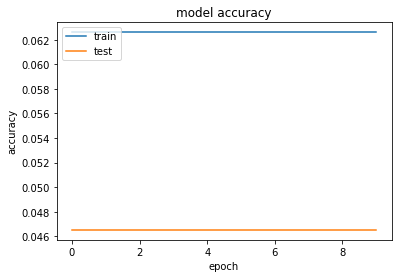

In [104]:
plt.figure(1)  
plt.plot(result.history['accuracy'])  
plt.plot(result.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [91]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))
            
            
            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            #
            #!
            #categorical_crossentropy
            #!
            #
            model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

            training_history = model.fit(X,
              y, 
              batch_size=32, epochs=10, validation_split=0.3,     
              validation_data = (X_test, y_test),
              callbacks=[tensorboard])

SyntaxError: unexpected EOF while parsing (<ipython-input-91-c1ccc66ebb1f>, line 41)

In [20]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

Fruits-1-conv-32-nodes-0-dense-29052020-162541
Fruits-2-conv-32-nodes-0-dense-29052020-162541
Fruits-3-conv-32-nodes-0-dense-29052020-162541
Fruits-1-conv-64-nodes-0-dense-29052020-162541
Fruits-2-conv-64-nodes-0-dense-29052020-162541
Fruits-3-conv-64-nodes-0-dense-29052020-162541
Fruits-1-conv-128-nodes-0-dense-29052020-162541
Fruits-2-conv-128-nodes-0-dense-29052020-162541
Fruits-3-conv-128-nodes-0-dense-29052020-162541
Fruits-1-conv-32-nodes-1-dense-29052020-162541
Fruits-2-conv-32-nodes-1-dense-29052020-162541
Fruits-3-conv-32-nodes-1-dense-29052020-162541
Fruits-1-conv-64-nodes-1-dense-29052020-162541
Fruits-2-conv-64-nodes-1-dense-29052020-162541
Fruits-3-conv-64-nodes-1-dense-29052020-162541
Fruits-1-conv-128-nodes-1-dense-29052020-162541
Fruits-2-conv-128-nodes-1-dense-29052020-162541
Fruits-3-conv-128-nodes-1-dense-29052020-162541
Fruits-1-conv-32-nodes-2-dense-29052020-162541
Fruits-2-conv-32-nodes-2-dense-29052020-162541
Fruits-3-conv-32-nodes-2-dense-29052020-162541
Fruits-

In [22]:
print("Average test loss: ", np.average(model.history['loss']))

TypeError: 'History' object is not subscriptable

In [81]:
len(test_data)

8734

In [82]:
len(training_data)

26105

In [89]:
X.shape

(78315, 32, 32, 1)

In [84]:
X_test.shape

(8734, 32, 32, 1)

In [88]:
y.shape

(26105,)

In [86]:
y_test.shape

(8734,)